In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b=3.0
N=100
T=1000

In [3]:
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))
filename = 'simulation_FJC_b=3.0_N=100_T=1000.xyz'
with open(filename, 'r') as file:
    for t in range(T):
        file.readline()
        file.readline()
        for n in range(N+1):
            data = file.readline()
            x[t,n] = float(data.split()[1])
            y[t,n] = float(data.split()[2])
            z[t,n] = float(data.split()[3])    

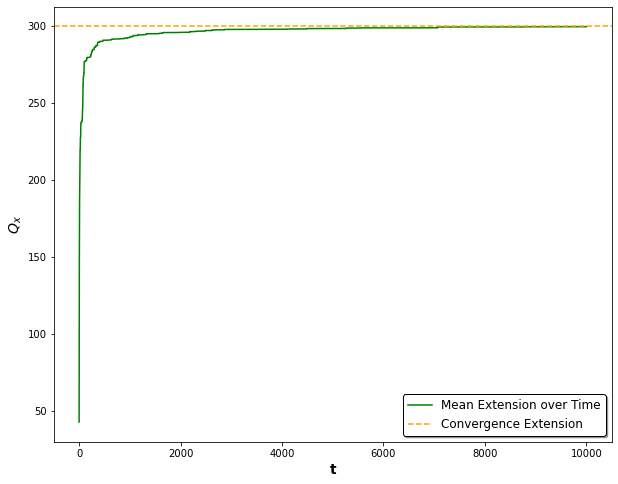

[ 42.70414541  53.15591618  93.32264838 ... 299.51509292 299.51509292
 299.51509292]


In [4]:
def metropolis_step(x, y, z, F, T, kb):
    N = len(x)
    i = np.random.randint(N)  # Choose a random bond to modify, except the last one
    scale_factor=0.00001
    # Current potential energy
    Q_current = [x[-1] - x[0], y[-1] - y[0], z[-1] - z[0]]
    V_current = - F * Q_current[0]  # Potential energy

    # Modify the bond vector with a smaller change
    new_x = x.copy()
    new_y = y.copy()
    new_z = z.copy()

    delta_x, delta_y, delta_z = np.random.normal(scale=scale_factor, size=3)
    delta_norm = np.sqrt(delta_x**2 + delta_y**2 + delta_z**2)
    delta_x, delta_y, delta_z = (b / delta_norm) * np.array([delta_x, delta_y, delta_z])

    # Update positions of subsequent monomers
    for j in range(i + 1, N):
        new_x[j] = new_x[j - 1] + delta_x
        new_y[j] = new_y[j - 1] + delta_y
        new_z[j] = new_z[j - 1] + delta_z

    # New potential energy
    Q_new = [new_x[-1] - new_x[0], new_y[-1] - new_y[0], new_z[-1] - new_z[0]]
    V_new = -F * Q_new[0]  # New potential energy

    energy_diff = (V_new - V_current) / (kb * T)
    # energy_diff = max(min(energy_diff, 150), -150)  # Limiting energy difference

    if energy_diff < 0:
        return new_x, new_y, new_z
    else:
        if np.random.rand() < np.exp(-energy_diff):
            return new_x, new_y, new_z  # Accept the move
        else:
            return x, y, z  # Reject the move


def calculate_extensions_over_time(x, y, z, F, T, kb, num_steps):
    extensions = np.zeros(num_steps)
    for t in range(num_steps):
        x, y, z = metropolis_step(x, y, z, F, T, kb)
        # Calculate the end-to-end distance vector
        Q = [x[-1] - x[0], y[-1] - y[0], z[-1] - z[0]]
        extensions[t] = np.abs(Q[0])  # Projection on the x-axis
    return extensions

# Constants
N = 100       # Number of monomers
kb = 8.617e-5       # Boltzmann constant in eV/K
T = 300      # Temperature in Kelvin
F = 10         # Force value
b = 3

# Boltzmann constant in J/K
kb_J_per_K = 1.38e-23 

# Convert kb to Hartrees/K (1 Hartree = 4.36 x 10^-18 J)
kb_Hartrees_per_K = kb_J_per_K / (4.36e-18)

# Now kb is in Hartrees/K, consistent with energy in atomic units and length in angstroms
# Initial positions of monomers
X, Y, Z = x[1,:], y[1,:], z[1,:]
# Calculating the extensions over time
def run_multiple_simulations(num_simulations, num_steps, x, y, z, F, T, kb):
    all_extensions = np.zeros((num_simulations, num_steps))
    for i in range(num_simulations):
        # Generate new random initial positions for each simulation
        x_sim, y_sim, z_sim = x, y, z
        extensions = calculate_extensions_over_time(x_sim, y_sim, z_sim, F, T, kb, num_steps)
        all_extensions[i] = extensions

    # Calculate the mean extension at each position
    mean_extensions = np.mean(all_extensions, axis=0)
    return mean_extensions

# Constants for the simulation
num_simulations = 10
num_steps = 10000

# Run multiple simulations and calculate mean extensions
mean_extensions = run_multiple_simulations(num_simulations, num_steps, X, Y, Z, F, T, kb_Hartrees_per_K)

# Plotting the mean extensions with a red dashed line to indicate convergence
plt.figure(figsize=(10, 8))
plt.plot(np.arange(num_steps), mean_extensions, label='Mean Extension over Time', color = "green")

# Adding a red dashed line to indicate the convergence point
convergence_extension = 300  # Adjust this value as needed
plt.axhline(y=convergence_extension, color='orange', linestyle='--', label='Convergence Extension')
plt.xlabel('t',fontsize=14, fontweight='bold')
plt.ylabel("$Q_x$", fontsize=14, fontweight='bold')
plt.legend(fontsize='large', shadow=True, frameon=True, facecolor = 'white', edgecolor = 'black')
# Save the figure
plt.savefig('convergence_plot.png')  # Saves the figure as 'convergence_plot.png'

plt.show()
print(mean_extensions)


In [5]:
num_data_points = 100
selected_indices = range(0, len(mean_extensions), len(mean_extensions)//num_data_points)
selected_mean_extensions = mean_extensions[selected_indices]
for i in range (15):
    selected_mean_extensions[i] = mean_extensions[i]
selected_mean_extensions/300

array([0.14234715, 0.17718639, 0.31107549, 0.33640947, 0.37868497,
       0.48603903, 0.52602338, 0.53390517, 0.54296125, 0.59039216,
       0.63305713, 0.63305713, 0.66428516, 0.66428516, 0.66652029,
       0.98308729, 0.98411621, 0.98560846, 0.98561211, 0.98582336,
       0.98602171, 0.98602171, 0.98771073, 0.98811983, 0.98860123,
       0.99003149, 0.99003149, 0.99165328, 0.99165328, 0.99244988,
       0.99244988, 0.99244988, 0.99249343, 0.99256055, 0.99263135,
       0.9926322 , 0.99270181, 0.99272035, 0.99272035, 0.99272035,
       0.99272035, 0.99317376, 0.99345213, 0.99345213, 0.99353194,
       0.99429791, 0.99429791, 0.99429791, 0.99430047, 0.99430047,
       0.99430246, 0.99436239, 0.99449665, 0.99540925, 0.99540925,
       0.99545197, 0.99581105, 0.99581105, 0.99586875, 0.99586875,
       0.99588527, 0.99588527, 0.99588527, 0.99588962, 0.99589949,
       0.99589949, 0.99590022, 0.99592188, 0.99596139, 0.99596139,
       0.99596139, 0.99779384, 0.99779384, 0.99779384, 0.99779

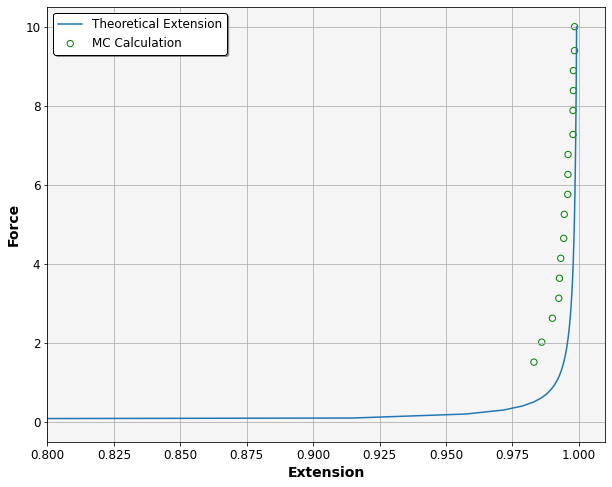

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 100             # Number of bonds
b = 3.0             # Bond length in Angstroms
kb = 8.617e-5       # Boltzmann constant in eV/K
T = 300             # Temperature in Kelvin

# Convert force range to eV/Å (assuming the original force is in Newtons)

F_values = np.linspace(0.00001, 10, N)  # Force values in eV/Å

# Calculate alpha values
alpha = F_values * b / (kb * T)

# Calculate theoretical extension for each force value and normalize it
theoretical_extensions = N * b * (1 / np.tanh(alpha) - 1 / alpha)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(theoretical_extensions/300, F_values, label='Theoretical Extension')  # Convert back to N for plotting
subset_indices = np.linspace(0, len(F_values) - 1, 20, dtype=int)
plt.scatter(selected_mean_extensions[subset_indices]/300, F_values[subset_indices], facecolors='none',edgecolors= 'green', s=40, label='MC Calculation')  # Convert back to N for plotting
plt.xlabel('Extension', fontsize=14, fontweight='bold')
plt.ylabel('Force', fontsize=14, fontweight='bold')
plt.legend(fontsize='large', shadow=True, frameon=True, facecolor = 'white', edgecolor = 'black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a background color to the plot area
ax = plt.gca()
ax.set_facecolor('whitesmoke')
# Saving the figure
plt.savefig('force_ex.png', format='png', dpi=300)
plt.grid(True)
plt.xlim(0.8, 1.01)
plt.show()

**Calculating Q and Rg**

In [8]:
Q=[];Rg=[]
for t in range(T):
    Q.append(np.sqrt((x[t,-1]-x[t,0])**2+(y[t,-1]-y[t,0])**2+(z[t,-1]-z[t,0])**2))
    Rcm = [np.mean(x[t,:]),np.mean(y[t,:]),np.mean(z[t,:])]
    Rg.append(np.sqrt(np.mean((x[t,:]-Rcm[0])**2 + (y[t,:]-Rcm[1])**2 + (z[t,:]-Rcm[2])**2)))

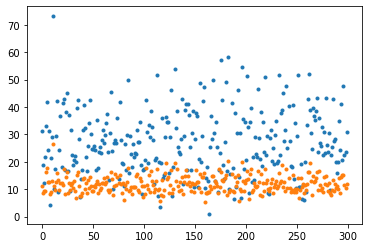

In [9]:
import matplotlib.pyplot as plt
plt.plot(Q,'.'); plt.plot(Rg,'.')

In [10]:
def calculate_intensity_factor(x, y, z, N, k_values):
    I = np.zeros(len(k_values))
    for k_idx in range(len(k_values)):  # Iterate over k_values
        sum_sin = 0
        for i in range(N):
            for j in range(N):
                r_diff = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
                if k_values[k_idx] * r_diff != 0:
                    sum_sin += np.sin(k_values[k_idx] * r_diff) / (k_values[k_idx] * r_diff)
                else:
                    sum_sin += 1  # sinc(0) = 1
        I[k_idx] = sum_sin ** 2
    return I

k_values = np.linspace(0, 0.2, N)  # Wave vector magnitudes ranging from 0 to 0.2

# Calculate the intensity factor
I_k = calculate_intensity_factor(x[1,:], y[1,:], z[1,:], N, k_values)
# I_k

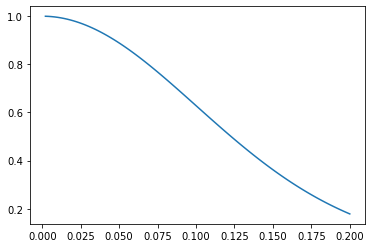

In [11]:
plt.plot(k_values[1:len(k_values)], I_k[1:len(I_k)]/100000000)

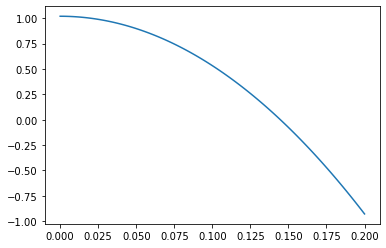

In [12]:
def guinier(N, k_values, Rg):
    # Theoretical intensity factor
    I_theoretical = (N + 1)**2 * (1 - (k_values * Rg)**2 / 3)
    return I_theoretical

# Example usage
Rg = np.mean(Rg)
I_theoretical = guinier(N, k_values, Rg)

plt.plot(k_values,I_theoretical/10000)
# I_theoretical# These will be the calculated and theoretical intensity factors I(k)

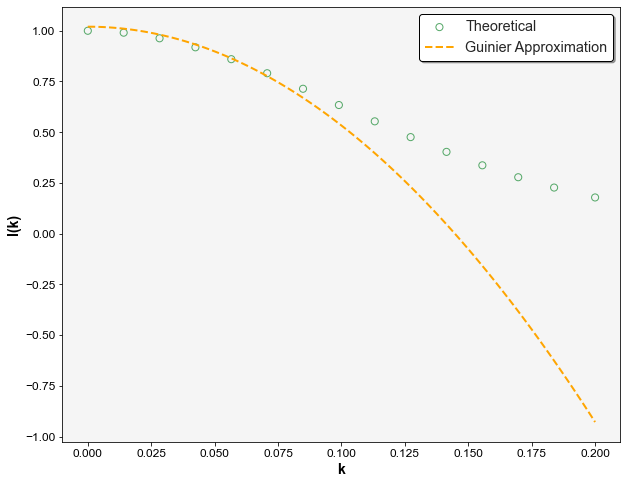

'scattering_intensity_plot.png'

In [13]:
import seaborn as sns
# Enhancing the plot with additional styling
plt.figure(figsize=(10, 8))

# Scatter plot for theoretical values
subset_indices = np.linspace(0, len(k_values) - 1, 15, dtype=int)
plt.scatter(k_values[subset_indices], I_k[subset_indices]/100000000, 
            facecolors='none', edgecolors='g', s=50, label='Theoretical')  # Increased marker size

# Line plot for Guinier Approximation with color changed to orange
plt.plot(k_values, I_theoretical/10000, color='orange', linewidth=2, label='Guinier Approximation', linestyle='--')
sns.set(style="darkgrid")
# Enhancing plot aesthetics
plt.xlabel('k', fontsize=14, fontweight='bold')
plt.ylabel('I(k)', fontsize=14, fontweight='bold')
plt.legend(fontsize='large', shadow=True, frameon=True, facecolor = 'white', edgecolor = 'black')  # Adding shadow to legend
# plt.grid(True, linestyle='-.')  # Changing grid line style
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a background color to the plot area
ax = plt.gca()
ax.set_facecolor('whitesmoke')
# Saving the figure
plt.savefig('scattering_intensity_plot.png', format='png', dpi=300)
plt.show()
# Indicating the path to the saved file
saved_file_path = 'scattering_intensity_plot.png'
saved_file_path


*Mean Square*

In [14]:
mQ2_sim=np.mean(np.array(Q)**2)
mQ2_th=N*b*b
print('mQ2 Simulation =',mQ2_sim)
print('mQ2 Theoretical =', mQ2_th)

mQ2 Simulation = 882.39497762
mQ2 Theoretical = 900.0


In [15]:
mRg2_sim=np.mean(np.array(Rg)**2)
mRg2_th=N*b*b/6
print('mRG2 simulation',mRg2_sim)
print('mRG2 Theoretical',mRg2_th)

mRG2 simulation 143.24081407965636
mRG2 Theoretical 150.0
